# SMS/EMAIL SPAM DETECTION MODEL
### Steps:
    1. Data Cleaning
    2. EDA
    3. Text Preprocessing
    4. Model Building
    5. Evaluation
    6. Improvement
    7. Website
    8. Deploy

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('dataset/spam.csv', encoding='latin-1')
df.head()

,class,message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

## Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   class       5572 non-null   object
 1   message     5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# dropping the unnecessary columns
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)
df.sample(5)

,class,message
2438,ham,I not busy juz dun wan 2 go so early.. Hee..
1470,ham,Take some small dose tablet for fever
869,spam,What do U want for Xmas? How about 100 free te...
1525,ham,Pls pls find out from aunt nike.
1950,ham,Oh ic. I thought you meant mary jane.


In [7]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['class'] = encoder.fit_transform(df['class'])
df.head(5)

,class,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
# missing values
df.isnull().sum()

class      0
message    0
dtype: int64

In [9]:
# check for duplicated values
df.duplicated().sum()

np.int64(403)

In [10]:
# drop duplicates
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [11]:
df.shape

(5169, 2)

## EDA

In [12]:
df['class'].value_counts()


class
0    4516
1     653
Name: count, dtype: int64

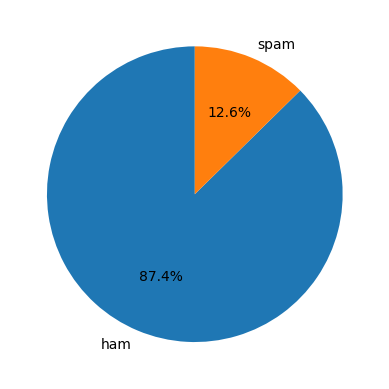

In [13]:
import matplotlib.pyplot as plt
plt.pie(df['class'].value_counts(), labels=['ham', 'spam'], autopct='%1.1f%%', startangle=90)
plt.show()

#### Data is imbalanced since there is only 12.6% spam but 87.4% ham

In [14]:
!pip3 install nltk
import nltk

In [15]:
nltk.download('punkt_tab')
nltk.download('punkt')

[nltk_data] Downloading package punkt_tab to /Users/kdas/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to /Users/kdas/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
df['num_characters'] = df['message'].apply(len)
df.head()

,class,message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [17]:
df['num_words'] = df['message'].apply(lambda x: len(nltk.word_tokenize(x)))
df.head()

,class,message,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [18]:
df['num_sentences'] = df['message'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head()

,class,message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [19]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [20]:
# ham
df[df['class'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [21]:
# spam
df[df['class'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [22]:
import seaborn as sns

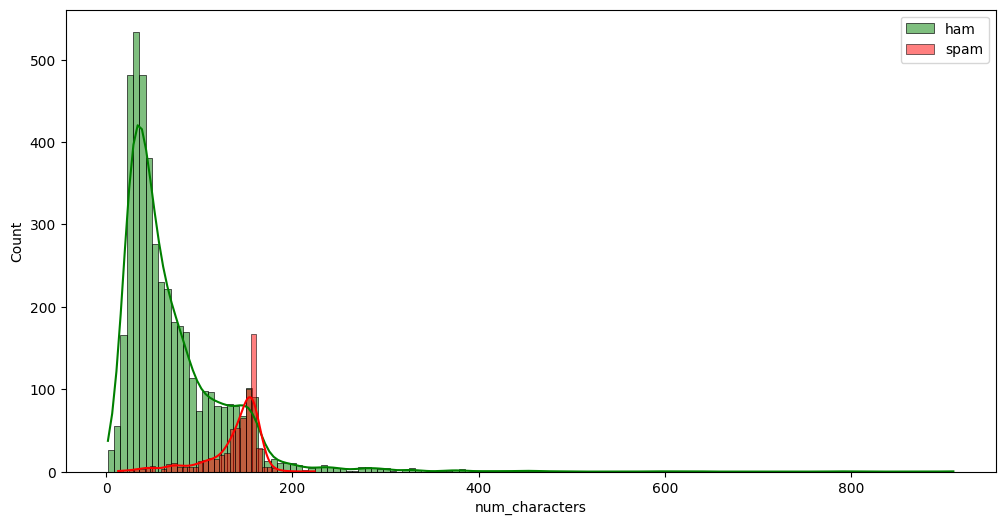

In [23]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df['class'] == 0]['num_characters'], color='green', label='ham', kde=True)
sns.histplot(df[df['class'] == 1]['num_characters'], color='red', label='spam', kde=True)
plt.legend()

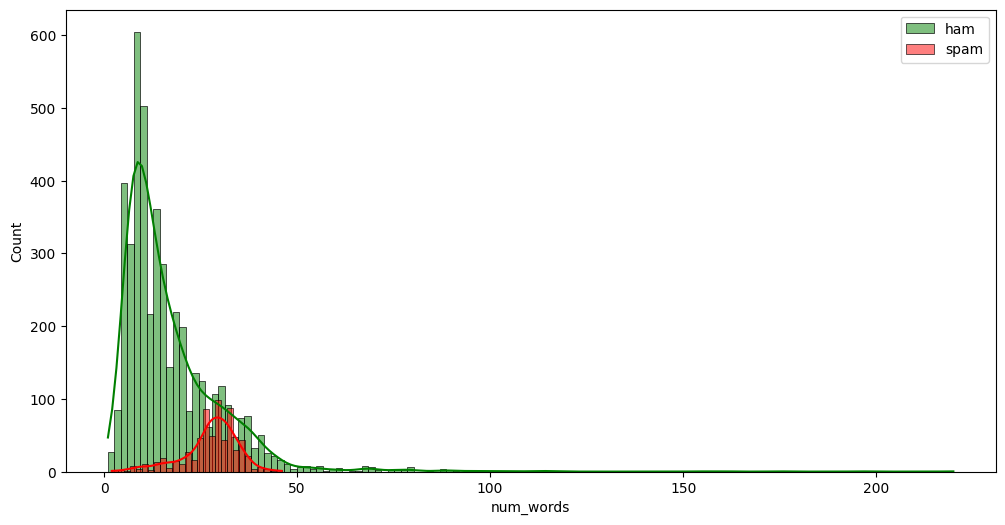

In [24]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df['class'] == 0]['num_words'], color='green', label='ham', kde=True)
sns.histplot(df[df['class'] == 1]['num_words'], color='red', label='spam', kde=True)
plt.legend()

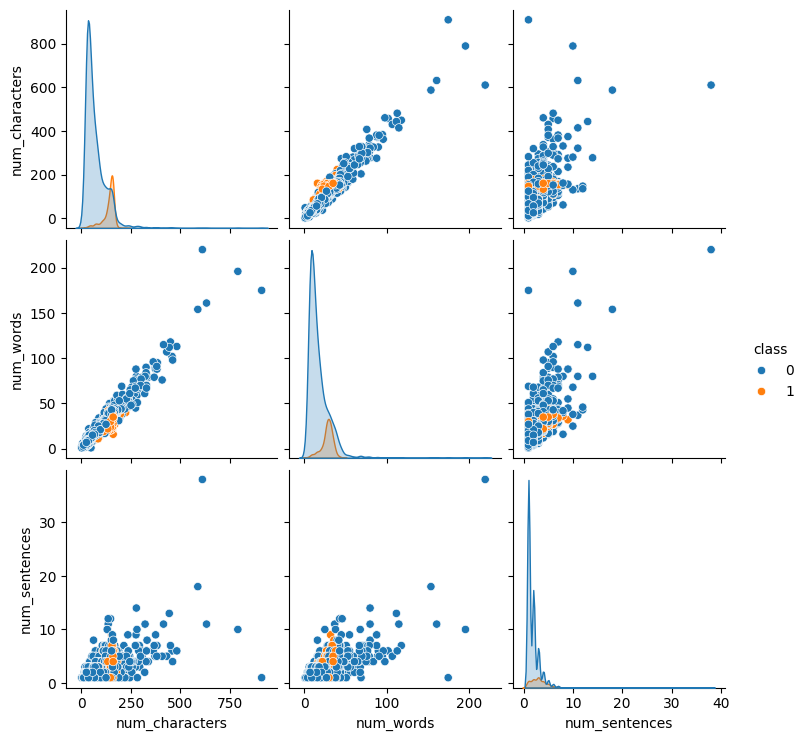

In [25]:
sns.pairplot(df, hue='class')

<Axes: >

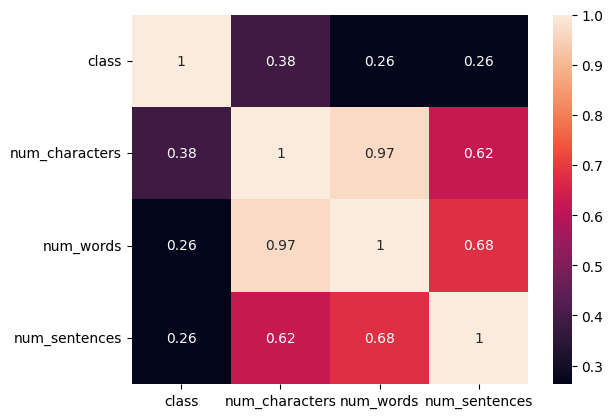

In [26]:
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True)


## Data Preprocessing
    1. Lower Case
    2. Tokenization
    3. Removing Special Characters
    4. Removing stop words and punctuation
    5. Stemming

In [27]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/kdas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [28]:
# For removing stopwords
from nltk.corpus import stopwords
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [29]:
# For removing Punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [30]:
# For Stemming
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [ ]:
# Function that will preform all the data processing
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [32]:
df['transformed_message'] = df['message'].apply(transform_text)

In [33]:
df.head(5)

,class,message,num_characters,num_words,num_sentences,transformed_message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


#### Now, we will generate the word cloud for all the words. It will display the words based on the occurence in data. Therefore, by doing this, we will get to know which words are used the most

In [34]:
!pip install wordcloud

In [35]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [36]:
# Word cloud for Spam Messages
spam_wc = wc.generate(df[df['class'] == 1]['transformed_message'].str.cat(sep=" "))

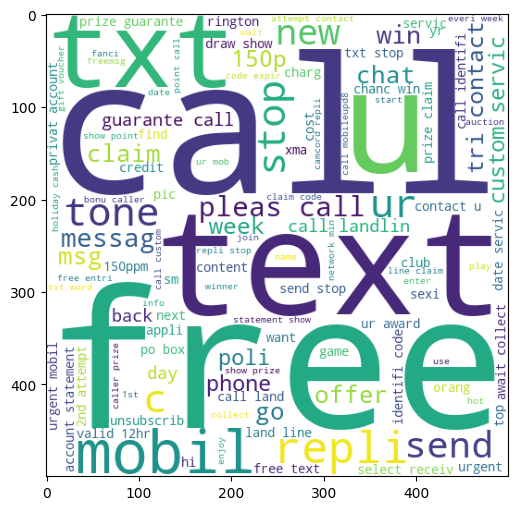

In [37]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [38]:
# Word cloud for Ham Messages
spam_wc = wc.generate(df[df['class'] == 0]['transformed_message'].str.cat(sep=" "))

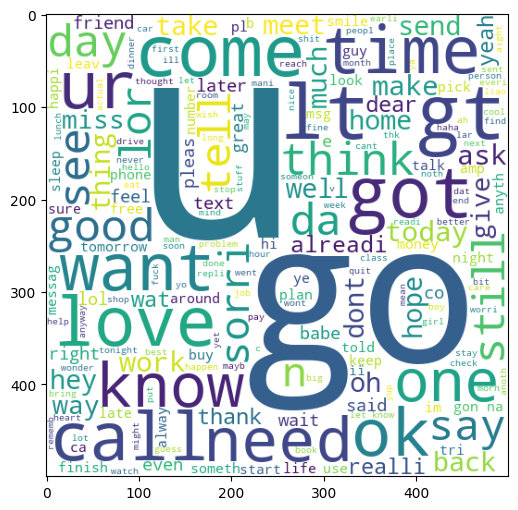

In [39]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

#### 
Our next task is to find out the top words used in both Spam and Ham messages.

In [40]:
# For spam messages
spam_corpus = []
for msg in df[df['class'] == 1]['transformed_message'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [41]:
len(spam_corpus)

9939

/var/folders/ll/th1yt3vx2f1gqbfm6qddffyc0000gn/T/ipykernel_1307/2989505274.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = pd.DataFrame(Counter(spam_corpus).most_common(30))[0], y = pd.DataFrame(Counter(spam_corpus).most_common(30))[1], palette='viridis')


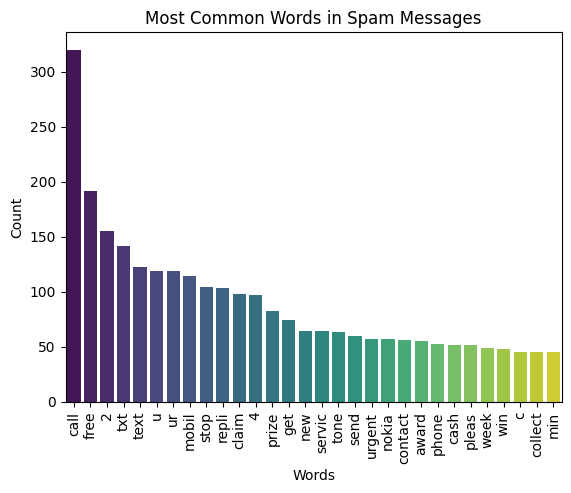

In [42]:
from collections import Counter
sns.barplot(x = pd.DataFrame(Counter(spam_corpus).most_common(30))[0], y = pd.DataFrame(Counter(spam_corpus).most_common(30))[1], palette='viridis')
plt.xticks(rotation='vertical')
plt.title('Most Common Words in Spam Messages')
plt.xlabel('Words')
plt.ylabel('Count')
plt.show()

In [43]:
# For Ham messages
ham_corpus = []
for msg in df[df['class'] == 0]['transformed_message'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [44]:
len(ham_corpus)

35404

/var/folders/ll/th1yt3vx2f1gqbfm6qddffyc0000gn/T/ipykernel_1307/2845698235.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0], y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1], palette='viridis')


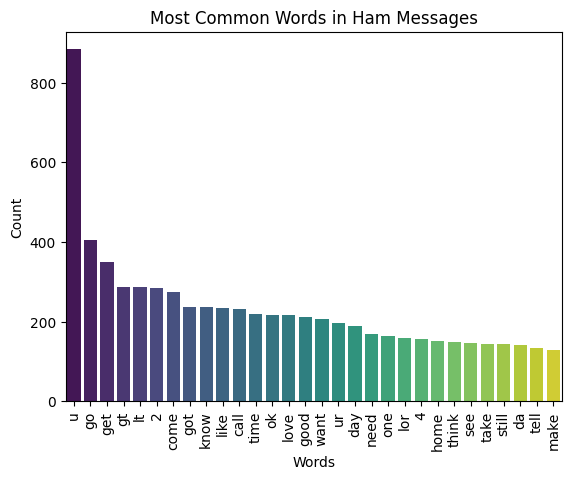

In [45]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0], y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1], palette='viridis')
plt.xticks(rotation='vertical')
plt.title('Most Common Words in Ham Messages')
plt.xlabel('Words')
plt.ylabel('Count')
plt.show()

# Model Building
The first model that we will make will be Naive Bayes Classification.
This is because it is a well known fact that Naive Bayes gives best performance on textual based data.

Every Machine Learning algorithm requires numerical input instead of alphabetical.
Therefore, we will have to convert the input to numbers or basically vectorize the input.

We will perform three steps:

    1. Vectorize the data using bag of words.
    2. Give it as input in the Naive Bayes Algorithm.
    3. Check the performance of the model.

In [46]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [47]:
X = cv.fit_transform(df['transformed_message']).toarray()
X.shape

(5169, 6708)

In [48]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(5169, 6708))

In [49]:
y = df['class'].values
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5169,))

In [50]:
# Applying train-test split
from sklearn.model_selection import train_test_split

In [51]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### Import all the Naives Bayes Algorithms

In [52]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [53]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

#### Accuracy Score: The ratio of correct predictions (true positives + true negatives) to the total number of predictions.
#### Precision: The fraction of positive cases correctly identified (the number of true positives divided by the number of true positives plus false positives).
#### Confusion Matrix: It is a tabulation of the predicted and actual value counts for each possible class.

In [54]:
# 1.GaussianNB
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8684719535783365
[[772 117]
 [ 19 126]]
0.5185185185185185


In [55]:
# 2.MultinomialNB
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9738878143133463
[[872  17]
 [ 10 135]]
0.8881578947368421


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


In [56]:
# 3.BernoulliNB
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9661508704061895
[[885   4]
 [ 31 114]]
0.9661016949152542


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


From the above results, we can see that Bernoulli Naive Bayes is giving the best results.

Now, we will check the performance of the model with TfidfVectorizer instead of CountVectorizer.

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [58]:
X = tfidf.fit_transform(df['transformed_message']).toarray()

In [59]:
y = df['class'].values

In [60]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [61]:
# 1.GaussianNB
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8636363636363636
[[772 117]
 [ 24 121]]
0.5084033613445378


In [62]:
# 2.MultinomialNB
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9613152804642167
[[888   1]
 [ 39 106]]
0.9906542056074766


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: in

In [63]:
# 3.BernoulliNB
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9661508704061895
[[885   4]
 [ 31 114]]
0.9661016949152542


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: in

As data is imbalanced, precision score matters more than accuracy score in this model.
In MultinomialNB with TfidfVectorizer, the precision_score is almost 1, therefore, we will chose this model. This is because we need a model which will not make any mistake. It will not label any email as spam when the email is not spam.
Now, we will compare our results with all the other models and check which one is the best performing one.

In [ ]:
import imaplib
import email
import datetime
import os

# Gmail credentials (replace with your credentials or use environment variables)
EMAIL = 'g24ai2013@iitj.ac.in'
PASSWORD = 'jhun lfjc viwt bwej'

# Connect to Gmail IMAP server
mail = imaplib.IMAP4_SSL('imap.gmail.com')
mail.login(EMAIL, PASSWORD)
mail.select('inbox')

# Search for all emails in inbox
result, data = mail.search(None, 'ALL')
email_ids = data[0].split()
latest_email_id = email_ids[-1]
print(f"Latest Email ID: {latest_email_id.decode()}")

# Fetch the latest email
result, msg_data = mail.fetch(latest_email_id, '(RFC822)')
raw_email = msg_data[0][1]
msg = email.message_from_bytes(raw_email)

# Extract email subject and body
subject = msg['subject']
body = ""
if msg.is_multipart():
    for part in msg.walk():
        if part.get_content_type() == "text/plain":
            body = part.get_payload(decode=True).decode()
            break
else:
    body = msg.get_payload(decode=True).decode()

# Combine subject and body for prediction
email_text = f"{subject} {body}"
print(f"Email Subject: {subject}")
print(f"Email Body: {body}")

# Preprocess and vectorize
transformed = transform_text(email_text)
vectorized = tfidf.transform([transformed]).toarray()

# Predict
prediction = mnb.predict(vectorized)[0]
label = 'Spam' if prediction == 1 else 'Ham'
print(f"Prediction: {label}")

# Create a label for spam found by MultinomialNB and move spam emails to that label
if prediction == 1:
    # Create the label if it doesn't exist
    label_name = "spam_found_by_mnb"
    mail.create(label_name)
    # Copy the email to the new label
    mail.copy(latest_email_id, label_name)
    print(f"Email ID {latest_email_id.decode()} moved to label '{label_name}'")
else:
    print("Email is not spam, no action taken.")

Latest Email ID: 2176
Email Subject: Your account has been suspended!
Email Body: Dear user,

We noticed suspicious activity in your account. Please verify your details
immediately to restore access.

Click here to verify: http://fake-verify-site.com

Sincerely,
Security Team

Prediction: Spam
Email ID 2176 moved to label 'spam_found_by_mnb'


Subject: Urgent: Your account has been suspended!

Dear user,

We noticed suspicious activity in your account. Please verify your details immediately to restore access.

Click here to verify: http://fake-verify-site.com

Sincerely,
Security Team

In [ ]:
# # Add a custom header or flag to mark the time when the email was predicted as spam
# if prediction == 1:
#     # Store the current timestamp as a custom flag in a local dictionary or file for tracking
#     # Example: save to a file or database (here, using a simple file for demonstration)
#     with open("spam_timer.txt", "a") as f:
#         f.write(f"{latest_email_id.decode()},{datetime.datetime.now().isoformat()}\n")
#     print("Timer started for 15 days for this spam email.")

# # To be run periodically (e.g., via a scheduled job) to check and delete emails after 15 days
# def delete_expired_spam_emails():
#     expired_ids = []
#     updated_lines = []
#     now = datetime.datetime.now()
#     if os.path.exists("spam_timer.txt"):
#         with open("spam_timer.txt", "r") as f:
#             lines = f.readlines()
#         for line in lines:
#             eid, timestamp = line.strip().split(",")
#             spam_time = datetime.datetime.fromisoformat(timestamp)
#             if (now - spam_time).days >= 15:
#                 # Delete the email from the mailbox
#                 mail.store(eid, '+FLAGS', '\\Deleted')
#                 expired_ids.append(eid)
#                 print(f"Email ID {eid} deleted after 15 days.")
#             else:
#                 updated_lines.append(line)
#         # Rewrite the file with non-expired entries
#         with open("spam_timer.txt", "w") as f:
#             f.writelines(updated_lines)
#         # Expunge deleted emails
#         if expired_ids:
#             mail.expunge()

#     # Example usage (call this function periodically, not in the main prediction flow)
#     # delete_expired_spam_emails()

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
# TODO: Add more classifiers and compare their performance to be done